 Kaggle House Prices: Advanced Regression Techniques
 
 Link : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


In [141]:
#import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [119]:
# Read data 
f = 'Data/train.csv'
t = 'Data/test.csv'
df_train = pd.read_csv(f)
test = pd.read_csv(t)
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [59]:
df_train.shape

(1460, 81)

In [54]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
#histogram
sns.distplot(df_train['SalePrice'])

    Relationship with numerical variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


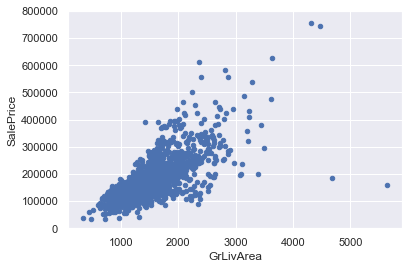

In [67]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
# => Mat do anh huong den gia ca, co quan he voi nhau

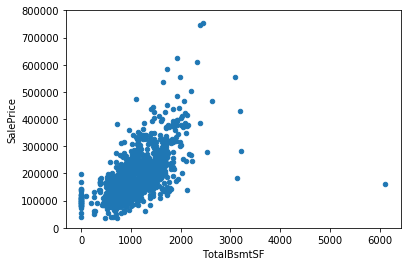

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
# => Tong dien tich tren gia ban cung linear voi nhau nhung phan phoi day dat hon grlivearea

    Relationship with categorical features

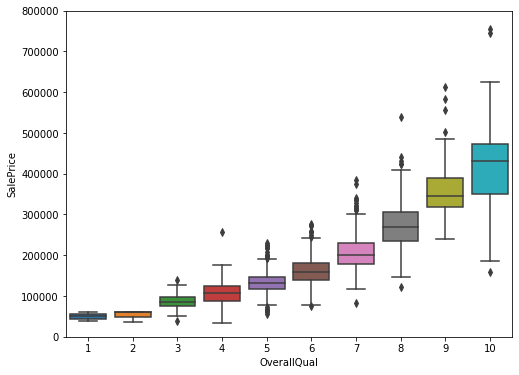

In [11]:
#box plot overallqual/saleprice . Overrallqual is Rates the overall material and finish of the house
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

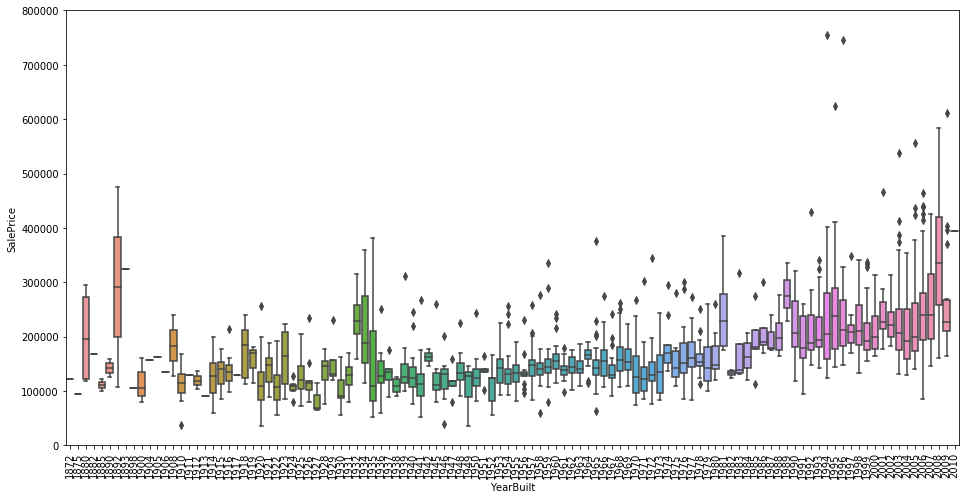

In [13]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

In summary

Stories aside, we can conclude that:

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

In [134]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='YlGnBu');

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two blue colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

# 'SalePrice' correlation matrix (zoomed heatmap style)

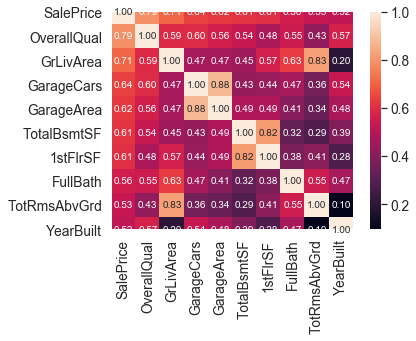

In [22]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
'FullBath'?? Really?
'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.
Let's proceed to the scatter plots.

#  Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

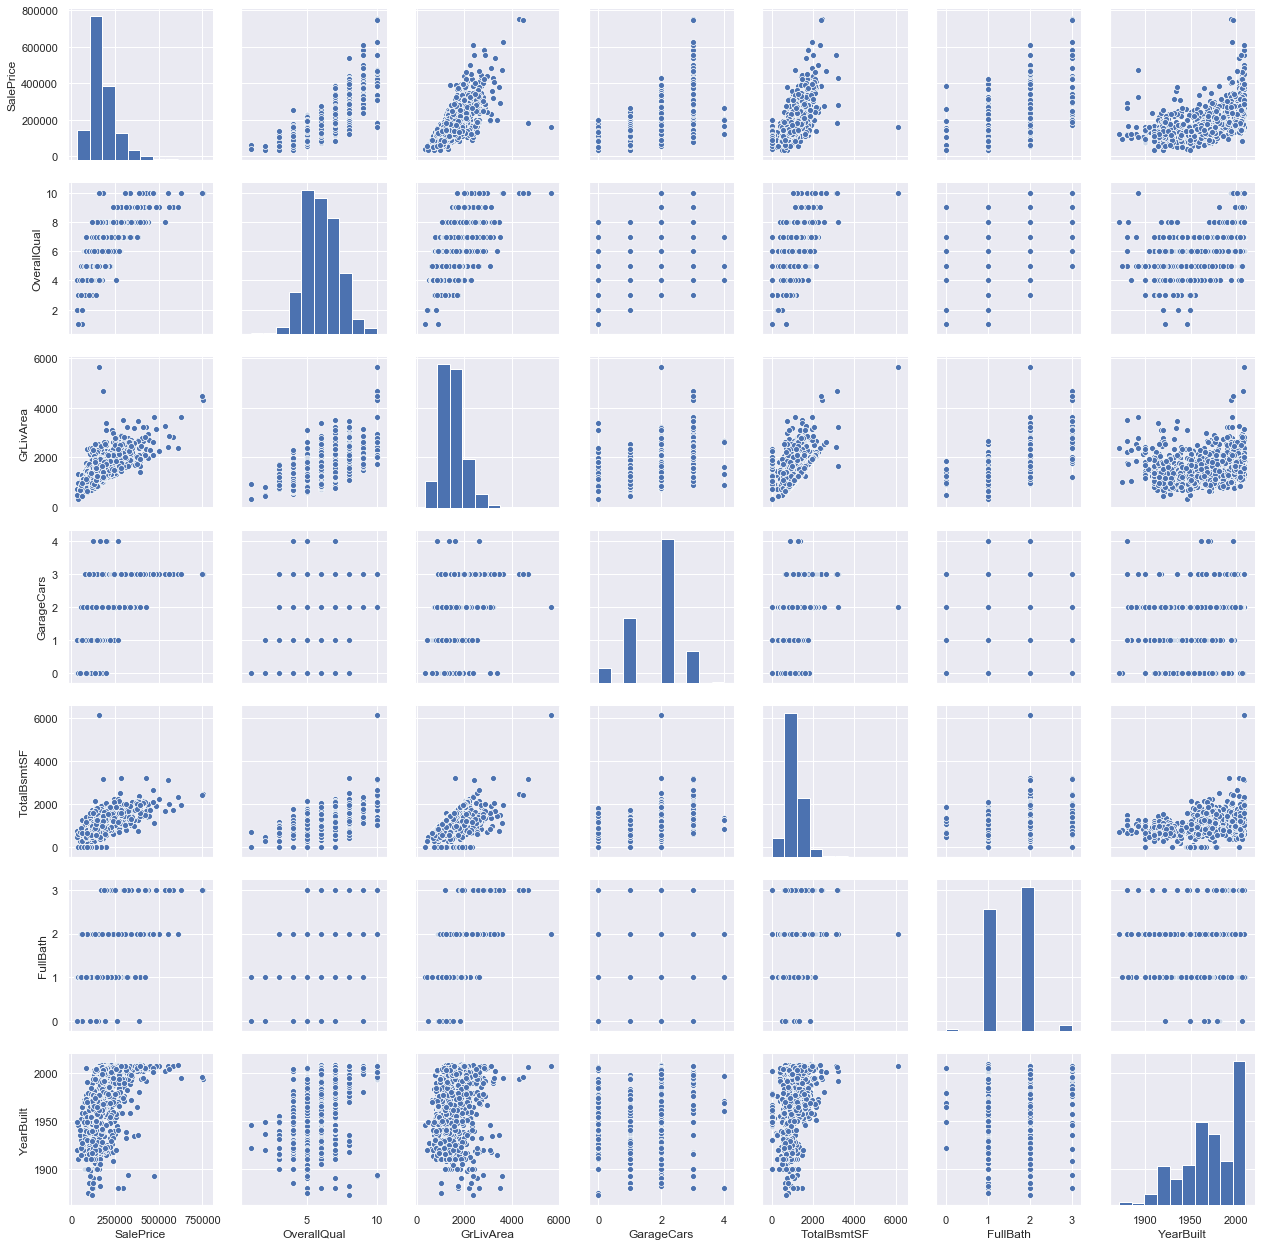

In [30]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

# Missing Value Data

Important questions when thinking about missing data:

- How prevalent is the missing data? 

- Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [35]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 𝑖𝑛5
i
n
5
 problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [62]:
#dealing with missing data
df_train1 = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train1 = df_train1.drop(df_train1.loc[df_train1['Electrical'].isnull()].index)
#just checking that there's no missing data missing...
df_train1.isnull().sum().max() 

0

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


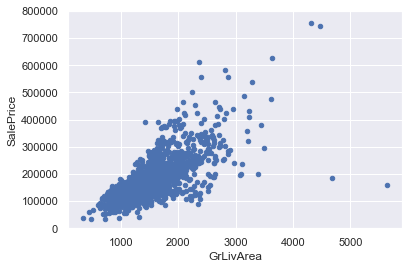

In [75]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

What has been revealed:

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [71]:
#deleting points
df_train1.sort_values(by = 'GrLivArea', ascending = False)[:2]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
1298  1299          60       RL    63887   Pave      IR3         Bnk   
523    524          60       RL    40094   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   
523     AllPub    Inside       Gtl      Edwards       PosN       PosN   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1298     1Fam     2Story           10            5       2008          2008   
523      1Fam     2Story           10            5       2007          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual ExterCond  \
1298       Hip  ClyTile      Stucco      Stucco        Ex        TA   
523        Hip  CompShg     CemntBd     CmentBd        Ex        TA   

     Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
1298      PConc        5644           0        466         6110    GasA   
523       PConc        2260           0        878         3138    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1298        Ex          Y      SBrkr      4692       950             0   
523         Ex          Y      SBrkr      3138      1538             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1298       5642             2             0         2         1             3   
523        4676             1             0         3         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
1298             1          Ex            12        Typ           3   
523              1          Ex            11        Typ           1   

      GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  \
1298           2        1418          Y         214          292   
523            3         884          Y         208          406   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1298              0          0            0       480        0       1   
523               0          0            0         0        0      10   

      YrSold SaleType SaleCondition  SalePrice  
1298    2008      New       Partial     160000  
523     2007      New       Partial     184750

In [72]:
df_train1 = df_train1.drop(df_train1[df_train1['Id'] == 1299].index)
df_train1 = df_train1.drop(df_train1[df_train1['Id'] == 524].index)

In [76]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train1['SalePrice'], df_train1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.

# In the search for normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

 - Histogram - Kurtosis and skewness.

 - Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.


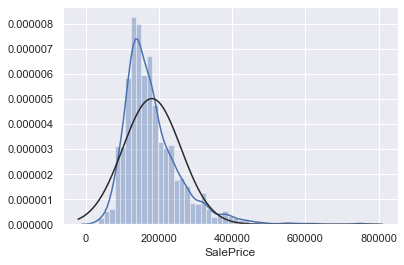

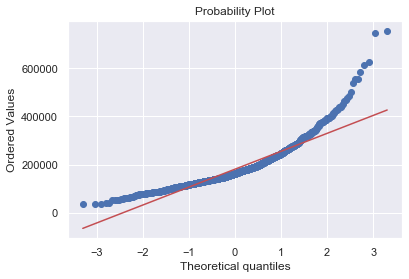

In [77]:
#histogram and normal probability plot
sns.distplot(df_train1['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1['SalePrice'], plot=plt)


Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

Avada kedavra!

In [78]:
#applying log transformation
df_train1['SalePrice'] = np.log(df_train1['SalePrice'])

In [79]:
df_train1['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1457, dtype: float64

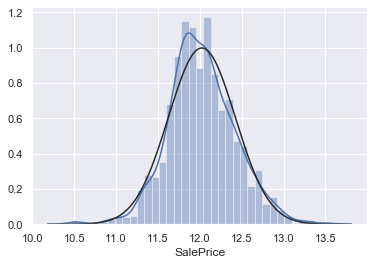

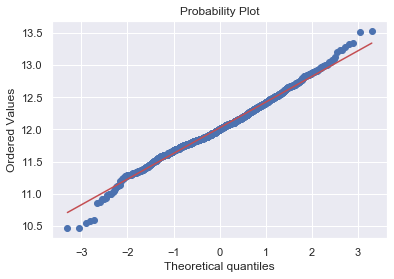

In [81]:
#transformed histogram and normal probability plot
sns.distplot(df_train1['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

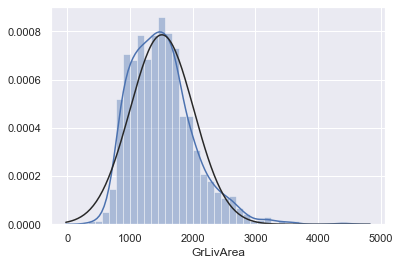

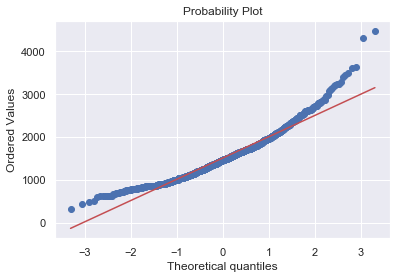

In [82]:
#histogram and normal probability plot
sns.distplot(df_train1['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1['GrLivArea'], plot=plt)

In [83]:
#data transformation
df_train1['GrLivArea'] = np.log(df_train1['GrLivArea'])

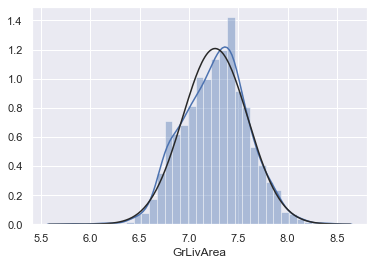

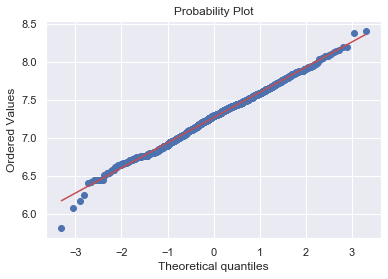

In [85]:
#transformed histogram and normal probability plot
sns.distplot(df_train1['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1['GrLivArea'], plot=plt)

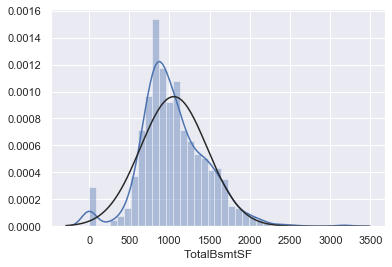

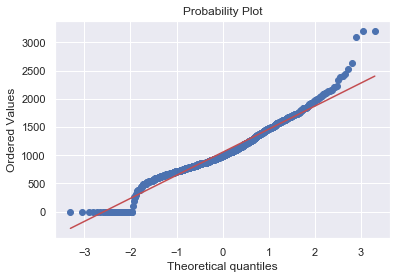

In [86]:
#histogram and normal probability plot
sns.distplot(df_train1['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [87]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train1['HasBsmt'] = pd.Series(len(df_train1['TotalBsmtSF']), index=df_train1.index)
df_train1['HasBsmt'] = 0 
df_train1.loc[df_train1['TotalBsmtSF']>0,'HasBsmt'] = 1

In [98]:
#transform data
df_train1.loc[df_train1['HasBsmt']==1,'TotalBsmtSF']  = np.log(df_train1['TotalBsmtSF'])

# 1 ham log khac giup tranh tinh trang co so 0 la ham log1p
# df_train1['TotalBsmtSF'] = np.log1p(df_train1['TotalBsmtSF']) <<< xai cai nay trong tuong lai

/Users/lethanhson/Documents/3_Learning/1. Machine Learing - AI/2.Vicohub/2.Thuctap/venv/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [108]:
df_train1

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual ExterCond  \
0        Gable  CompShg     VinylSd     VinylSd        Gd        TA   
1        Gable  CompShg     MetalSd     MetalSd        TA        TA   
2        Gable  CompShg     VinylSd     VinylSd        Gd        TA   
3        Gable  CompShg     Wd Sdng     Wd Shng        TA        TA   
4        Gable  CompShg     VinylSd     VinylSd        Gd        TA   
...        ...      ...         ...         ...       ...       ...   
1455     Gable  CompShg     VinylSd     VinylSd        TA        TA   
1456     Gable  CompShg     Plywood     Plywood        TA        TA   
1457     Gable  CompShg     CemntBd     CmentBd        Ex        Gd   
1458       Hip  CompShg     MetalSd     MetalSd        TA        TA   
1459     Gable  CompShg     HdBoard     HdBoard        Gd        TA   

     Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         PConc         706           0        150     6.752270    GasA   
1        CBlock         978           0        284     7.140453    GasA   
2         PConc         486           0        434     6.824374    GasA   
3        BrkTil         216           0        540     6.628041    GasA   
4         PConc         655           0        490     7.043160    GasA   
...         ..

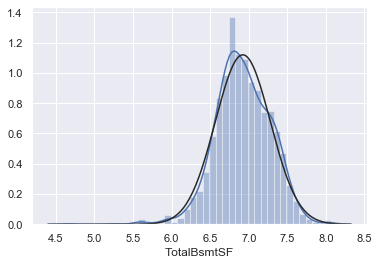

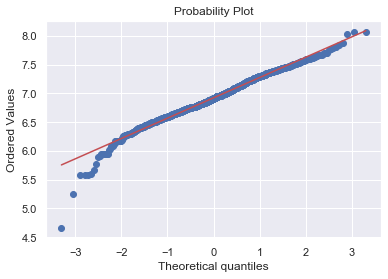

In [109]:
#histogram and normal probability plot
sns.distplot(df_train1[df_train1['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1[df_train1['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

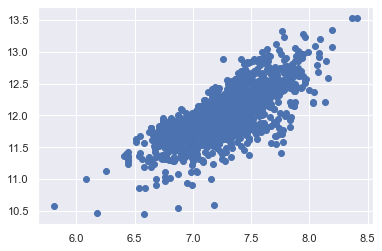

In [110]:
#scatter plot
plt.scatter(df_train1['GrLivArea'], df_train1['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

In [114]:
#scatter plot
plt.scatter(df_train1[df_train1['TotalBsmtSF']>0]['TotalBsmtSF'], df_train1[df_train1['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

Last but not the least, dummy variables

In [115]:
#convert categorical variable into dummy
df_train2 = pd.get_dummies(df_train1)

In [204]:
df_train2

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0             2003         706           0        150     6.752270       856   
1             1976         978           0        284     7.140453      1262   
2             2002         486           0        434     6.824374       920   
3             1970         216           0        540     6.628041       961   
4             2000         655           0        490     7.043160      1145   
...            ...         ...         ...        ...          ...       ...   
1455          2000           0           0        953     6.859615       953   
1456          1988         790         163        589     7.340836      2073   
1457          2006         275           0        877     7.049255      1188   
1458          1996          49        1029          0     6.982863      1078   
1459          1965         830         290        136     7.135687      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0   7.444249             1             0         2   
1            0             0   7.140453             0             1         2   
2          866             0   7.487734             1             0         2   
3          756             0   7.448334             1             0         1   
4         1053             0   7.695303             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0   7.406711             0             0         2   
1456         0             0   7.636752             1             0         2   
1457      1152             0   7.757906             0             0         2   
1458         0             0   6.982863             1             0         1   
1459         0             0   7.135687             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42              0   
3              3         642           0           35   

In [136]:
#Standardize the features by removing the mean and by scaling to unit variance.
scaler = StandardScaler()

In [139]:
#Next, define the regressor you want to use. This notebook uses the Linear Regression model.
lr = LinearRegression()

In [142]:
#Build the pipeline.
#A pipeline consists of a transformer (Standard Scaler) and an estimator (Linear Regression model).
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])

In [241]:
x_train = df_train2.drop(['SalePrice','HasBsmt'], axis = 1)
y_train = df_train2.SalePrice
x_train.shape

(1457, 220)

In [242]:
#Train model
model = pipeline.fit(x_train, y_train)

In [262]:
# Bien doi tap test de co so cot = voi so cot tap train -> su dung tap train1
# tao ra 1 df giong voi df_train1 nhung loai bo HasBsmt va SalePrice
co = df_train1.columns
co = co.drop(['HasBsmt','SalePrice'])
temp = df_train1[co]
temp.shape
# TAO RA df x_test co so cot = so cot cua df_train1 
x_test = test[co]
# merge file temp va file x_test
mer = pd.concat([temp, x_test], axis=0)
mer

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1454  2915         160       RM     1936   Pave      Reg         Lvl   
1455  2916         160       RM     1894   Pave      Reg         Lvl   
1456  2917          20       RL    20000   Pave      Reg         Lvl   
1457  2918          85       RL    10441   Pave      Reg         Lvl   
1458  2919          60       RL     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1454    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1455    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1456    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
1457    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
1458    AllPub    Inside       Mod      Mitchel       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1454    Twnhs     2Story            4            7       1970          1970   
1455   TwnhsE     2Story            4            5       1970          1970   
1456     1Fam     1Story            5            7       1960          1996   
1457     1Fam     SFoyer            5            5       1992          1992   
1458     1Fam     2Story            7            5       1993          1994   

     RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual ExterCond  \
0        Gable  CompShg     VinylSd     VinylSd        Gd        TA   
1        Gable  CompShg     MetalSd     MetalSd        TA        TA   
2        Gable  CompShg     VinylSd     VinylSd        Gd        TA   
3        Gable  CompShg     Wd Sdng     Wd Shng        TA        TA   
4        Gable  CompShg     VinylSd     VinylSd        Gd        TA   
...        ...      ...         ...         ...       ...       ...   
1454     Gable  CompShg     CemntBd     CmentBd        TA        TA   
1455     Gable  CompShg     CemntBd     CmentBd        TA        TA   
1456     Gable  CompShg     VinylSd     VinylSd        TA        TA   
1457     Gable  CompShg     HdBoard     Wd Shng        TA        TA   
1458     Gable  CompShg     HdBoard     HdBoard        TA        TA   

     Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         PConc       706.0         0.0      150.0     6.752270    GasA   
1        CBlock       978.0         0.0      284.0     7.140453    GasA   
2         PConc       486.0         0.0      434.0     6.824374    GasA   
3        BrkTil       216.0         0.0      540.0     6.628041    GasA   
4         PConc       655.0         0.0      490.0     7.043160    GasA   
...         ..

In [247]:
x_train


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0             2003         706           0        150     6.752270       856   
1             1976         978           0        284     7.140453      1262   
2             2002         486           0        434     6.824374       920   
3             1970         216           0        540     6.628041       961   
4             2000         655           0        490     7.043160      1145   
...            ...         ...         ...        ...          ...       ...   
1455          2000           0           0        953     6.859615       953   
1456          1988         790         163        589     7.340836      2073   
1457          2006         275           0        877     7.049255      1188   
1458          1996          49        1029          0     6.982863      1078   
1459          1965         830         290        136     7.135687      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0   7.444249             1             0         2   
1            0             0   7.140453             0             1         2   
2          866             0   7.487734             1             0         2   
3          756             0   7.448334             1             0         1   
4         1053             0   7.695303             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0   7.406711             0             0         2   
1456         0             0   7.636752             1             0         2   
1457      1152             0   7.757906             0             0         2   
1458         0             0   6.982863             1             0         1   
1459         0             0   7.135687             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42              0   
3              3         642           0           35   

In [234]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [263]:
mer = pd.get_dummies(mer)



Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0     1461          20    11622            5            6       1961   
1     1462          20    14267            6            6       1958   
2     1463          60    13830            5            5       1997   
3     1464          60     9978            6            6       1998   
4     1465         120     5005            8            5       1992   
...    ...         ...      ...          ...          ...        ...   
1454  2915         160     1936            4            7       1970   
1455  2916         160     1894            4            5       1970   
1456  2917          20    20000            5            7       1960   
1457  2918          85    10441            5            5       1992   
1458  2919          60     9627            7            5       1993   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0             1961       468.0       144.0      270.0        882.0       896   
1             1958       923.0         0.0      406.0       1329.0      1329   
2             1998       791.0         0.0      137.0        928.0       928   
3             1998       602.0         0.0      324.0        926.0       926   
4             1992       263.0         0.0     1017.0       1280.0      1280   
...            ...         ...         ...        ...          ...       ...   
1454          1970         0.0         0.0      546.0        546.0       546   
1455          1970       252.0         0.0      294.0        546.0       546   
1456          1996      1224.0         0.0        0.0       1224.0      1224   
1457          1992       337.0         0.0      575.0        912.0       970   
1458          1994       758.0         0.0      238.0        996.0       996   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0            0             0      896.0           0.0           0.0         1   
1            0             0     1329.0           0.0           0.0         1   
2          701             0     1629.0           0.0           0.0         2   
3          678             0     1604.0           0.0           0.0         2   
4            0             0     1280.0           0.0           0.0         2   
...        ...           ...        ...           ...           ...       ...   
1454       546             0     1092.0           0.0           0.0         1   
1455       546             0     1092.0           0.0           0.0         1   
1456         0             0     1224.0           1.0           0.0         1   
1457         0             0      970.0           0.0           1.0         1   
1458      1004             0     2000.0           0.0           0.0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            0             2             1             5           0   
1            1             3             1             6           0   
2            1             3             1             6           1   
3            1             3             1             7           1   
4            0             2             1             5           0   
...        ...           ...           ...           ...         ...   
1454         1             3             1             5           0   
1455         1             3             1             6           0   
1456         0             4             1             7           1   
1457         0             3             1             6           0   
1458         1             3             1             9           1   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0            1.0       730.0         140            0              0   
1            1.0       312.0         393           36              0   
2            2.0       482.0         212           34              0   
3            2.0       470.0         360           36   

In [300]:
total = mer.isnull().sum().sort_values(ascending=False)
percent = (mer.isnull().sum()/mer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
SaleCondition_Partial      0      0.0
Neighborhood_IDOTRR        0      0.0
Neighborhood_SawyerW       0      0.0
Neighborhood_Sawyer        0      0.0
Neighborhood_SWISU         0      0.0
Neighborhood_OldTown       0      0.0
Neighborhood_NridgHt       0      0.0
Neighborhood_NoRidge       0      0.0
Neighborhood_NWAmes        0      0.0
Neighborhood_NPkVill       0      0.0
Neighborhood_NAmes         0      0.0
Neighborhood_Mitchel       0      0.0
Neighborhood_MeadowV       0      0.0
Neighborhood_Gilbert       0      0.0
Neighborhood_StoneBr       0      0.0
Neighborhood_Edwards       0      0.0
Neighborhood_Crawfor       0      0.0
Neighborhood_CollgCr       0      0.0
Neighborhood_ClearCr       0      0.0
Neighborhood_BrkSide       0      0.0

In [298]:
# mer.replace(to_replace = np.nan, value = 0 )
mer.fillna(0.0, inplace = True)
# mer.loc[mer.BsmtFullBath.isnull()]
mer.isnull().sum().max()


0

In [328]:
# lay log 2 features nay vi tap train da log 2 features nay
mer.GrLivArea = np.log1p(mer.GrLivArea)
mer.TotalBsmtSF = np.log1p(mer.TotalBsmtSF)

In [329]:
y_pred = model.predict(mer)

In [338]:
y_pred

array([11.67117542, 11.97293323, 12.11319202, ..., 12.02395862,
       11.66202014, 12.33255237])

In [339]:
y_pred_conv = np.exp(y_pred)

/Users/lethanhson/Documents/3_Learning/1. Machine Learing - AI/2.Vicohub/2.Thuctap/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [373]:
y_pred_conv

array([117145.89649385, 158408.62822997, 182260.45547563, ...,
       166701.25857539, 116078.28835872, 226965.28804123])

In [374]:
y_train.max()

13.534473028231162

In [375]:
y_pred.max()

17317670940335.725

In [387]:
submission = pd.DataFrame({"Id": test["Id"],"SalePrice": y_pred_conv})
submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0
submission.loc[submission.SalePrice == np.inf, 'SalePrice'] = 0
submission.to_csv('submission.csv', index=False)

In [388]:
submission

Id      SalePrice
0     1461  117145.896494
1     1462  158408.628230
2     1463  182260.455476
3     1464  198737.446579
4     1465  200761.256926
...    ...            ...
1454  2915   85194.654498
1455  2916   82241.527146
1456  2917  166701.258575
1457  2918  116078.288359
1458  2919  226965.288041

[1459 rows x 2 columns]

In [385]:
type(submission.iloc[95].SalePrice)

numpy.float64

In [389]:
submission.loc[submission.SalePrice == np.inf]

Empty DataFrame
Columns: [Id, SalePrice]
Index: []